## Modulo designado para la creación de el modelo usando XGBOOST
En este punto los datasets ya se encuentran en archivos .csv dentro de la carpeta
"CSV ready to model"


In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier #esta parcera toca instalarla pip install xgboost
from sklearn.preprocessing import LabelEncoder
import qgrid
from scikitplot.metrics import plot_roc, plot_roc_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import time
import qgrid

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
df=pd.read_csv('../../CSV ready to model/withoutPCA.csv')

Label encoder para la columna a predecir

In [12]:
print('Xgboost')
le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)
y=df['GRAVEDAD']
x=df.drop(['GRAVEDAD'],axis=1)

Xgboost


In [13]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [14]:
def model_XG(x,y,estimadores, caracteristicas, impresion = False,normalize=False):
    
    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)

    XG = XGBClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        XG.fit(Xtrain, Ytrain)
        pred = XG.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)


    if impresion == True:
        #Curva ROC
        #
        # rf_probs = XG.predict_proba(Xtest)
        # print(rf_probs)
        # plot_roc(Xtest, Ytest, rf_probs, "Random Forest")
        # auc = roc_auc_score(Ytest, pred)
        # print('AUC: %.2f' % auc)
        # fpr, tpr, thresholds = roc_curve(Ytest, pred)
        # plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred,normalize)
    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
            'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
            'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
            'F':np.mean(f_list),'Int_F':np.std(f_list),
            'Error':np.mean(errores),'Int_Error':np.std(errores),
            'Tiempo':time.time()-tiempo_i
            }
    return  result


In [15]:
result = model_XG(x=x,y=y,estimadores=100,caracteristicas= 9, impresion = False,normalize=False)

ValueError: bad input shape (85244, 3)

In [24]:
print(result)

{'Eficiencia': 0.7724353334506422, 'Int_Eficiencia': 0.002317695824434553, 'Sensibilidad': 0.5941378116465531, 'Int_Sensibilidad': 0.29318773328390746, 'Precisión': 0.8215158665302941, 'Int Precisión': 0.09840781887035811, 'F': 0.6285918262301246, 'Int_F': 0.2044828129410665, 'Error': 0.22756466654935772, 'Int_Error': 0.002317695824434558, 'Tiempo': 78.74295806884766}


In [ ]:
pd.options.mode.chained_assignment = None
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,
                                     10,10,10,10,10,
                                     20,20,20,20,20,
                                     50,50,50,50,50,
                                     100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""

df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    result = model_XG(x,y,n, k, impresion = False)
    df_types["Eficiencia"][n,k] = result['Eficiencia']
    df_types["Int_Eficiencia"][n,k] = result['Int_Eficiencia']
    df_types["Sensibilidad"][n,k] = result['Sensibilidad']
    df_types["Int_Sensibilidad"][n,k] = result['Int_Sensibilidad']
    df_types["Precision"][n,k] = result['Precisión']
    df_types["Int_Precision"][n,k] = result['Precisión']
    df_types["F-Score"][n,k] = result['F']
    df_types["Int_F-Score"][n,k] = result['Int_F']
    df_types["Error_Prueba"][n,k] = result['Error']
    df_types["Int_error"][n,k] = result['Int_Error']
    df_types["Tiempo de ejecución"][n,k] = result['Tiempo']


#df_types.sort_index(inplace=True)



In [ ]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
print(y)
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

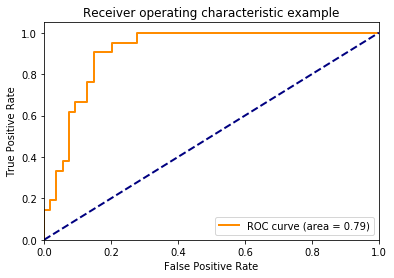

In [4]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/home/sht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


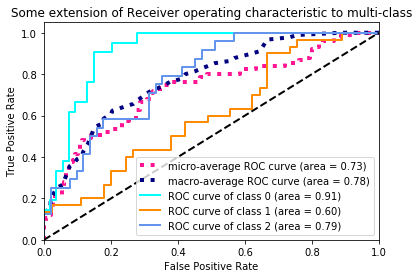

In [5]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()